<a href="https://colab.research.google.com/github/mmaithani/face-recognition-attendance-system/blob/main/Realtime%20face%20attendance%20system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing google drive into runtime

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip install -r '/content/drive/MyDrive/Attendance system/requirements.txt'

# installing face recognition library

In [ ]:
!pip install face_recognition

# import module

In [3]:
import IPython  #nec. dependecy
import uuid
from google.colab import output
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime

# opencv module for google colab notebook

In [4]:
from google.colab.patches import cv2_imshow

# Testing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5319  100  5319    0     0  26462      0 --:--:-- --:--:-- --:--:-- 26462


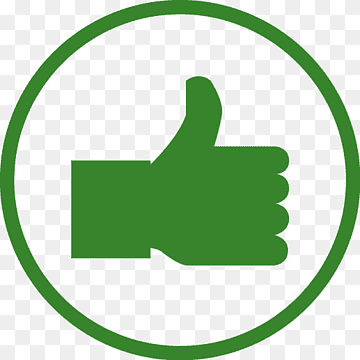

In [11]:
!curl -o logo.png https://w1.pngwing.com/pngs/377/843/png-transparent-green-leaf-logo-thumb-signal-hand-history-text-human-line-finger-thumbnail.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# testing if GPU is connected

In [5]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# granting camera access to google colab

In [6]:
from google.colab import output
from google.colab import drive
from IPython.display import display, Javascript

def allow_camera():
  display(Javascript('''
    async function allow_camera(){
        const cam = await navigator.mediaDevices.getUserMedia({video: true});
        document.querySelector('#cam').srcObject = cam;
        console.log('camera access granted');
    }
    allow_camera();
  '''))
  print('Camera access granted.')

allow_camera();

<IPython.core.display.Javascript object>

Camera access granted.


# defining classes for encoding, attendance marking

In [7]:
from PIL import ImageGrab

path = '/content/drive/MyDrive/Attendance system/Training_images'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    # cv2_imshow(curImg) #test1
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)


def findEncodings(images):
    encodeList = []

    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList
#encoded_face_train = findEncodings(images)

def markAttendance(name):
    with open('/content/drive/MyDrive/Attendance system/Attendance.csv', 'w+') as f:

        myDataList = f.readlines()

        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
            if name not in nameList:
                now = datetime.now()
                dtString = now.strftime('%H:%M:%S')
                f.writelines(f'\n{name},{dtString}')

encodeListKnown = findEncodings(images)
print('Encoding Complete')

['Malay Kumar.jpg', 'navneet.jpeg', 'Ali.jpeg', 'mohit.png']
['Malay Kumar', 'navneet', 'Ali', 'mohit']
Encoding Complete


# executing the learning into video

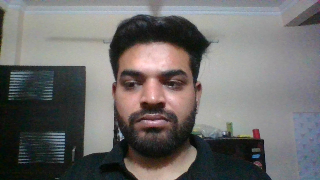

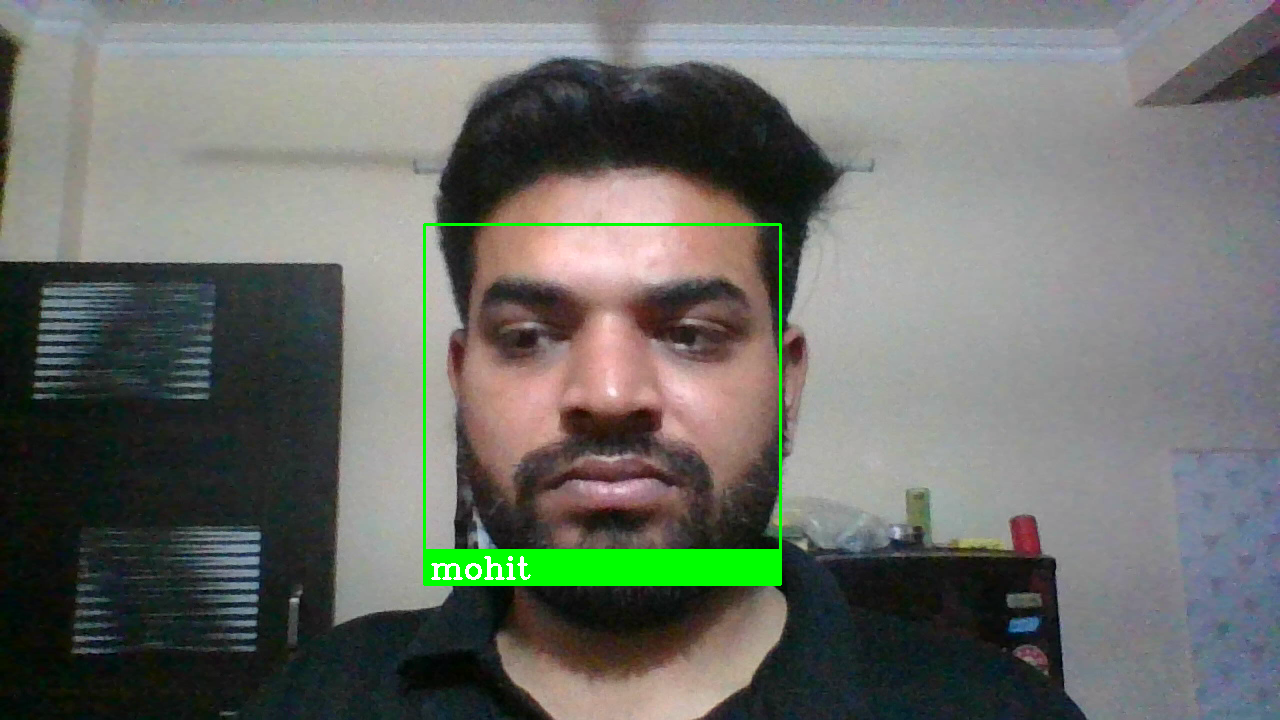

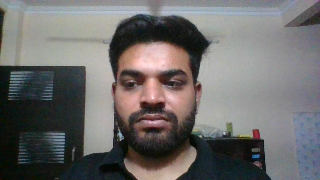

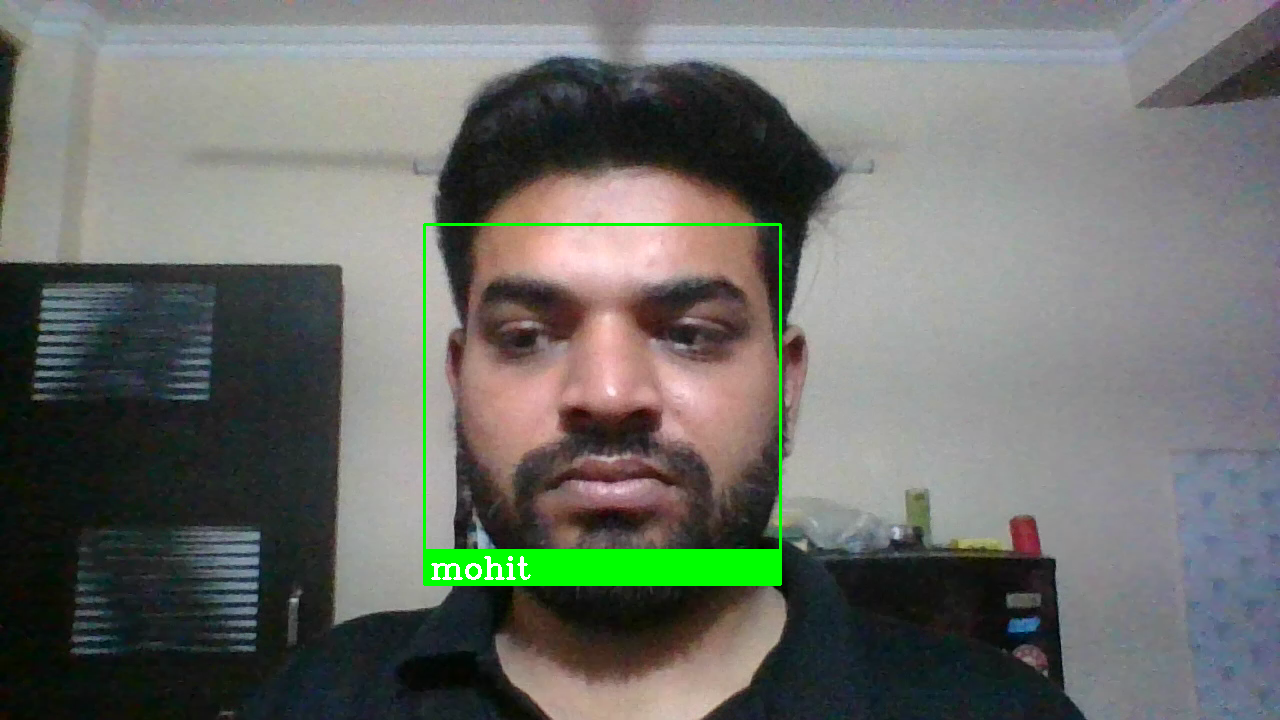

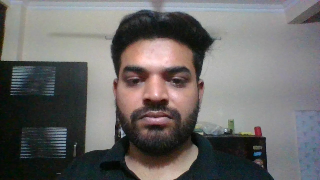

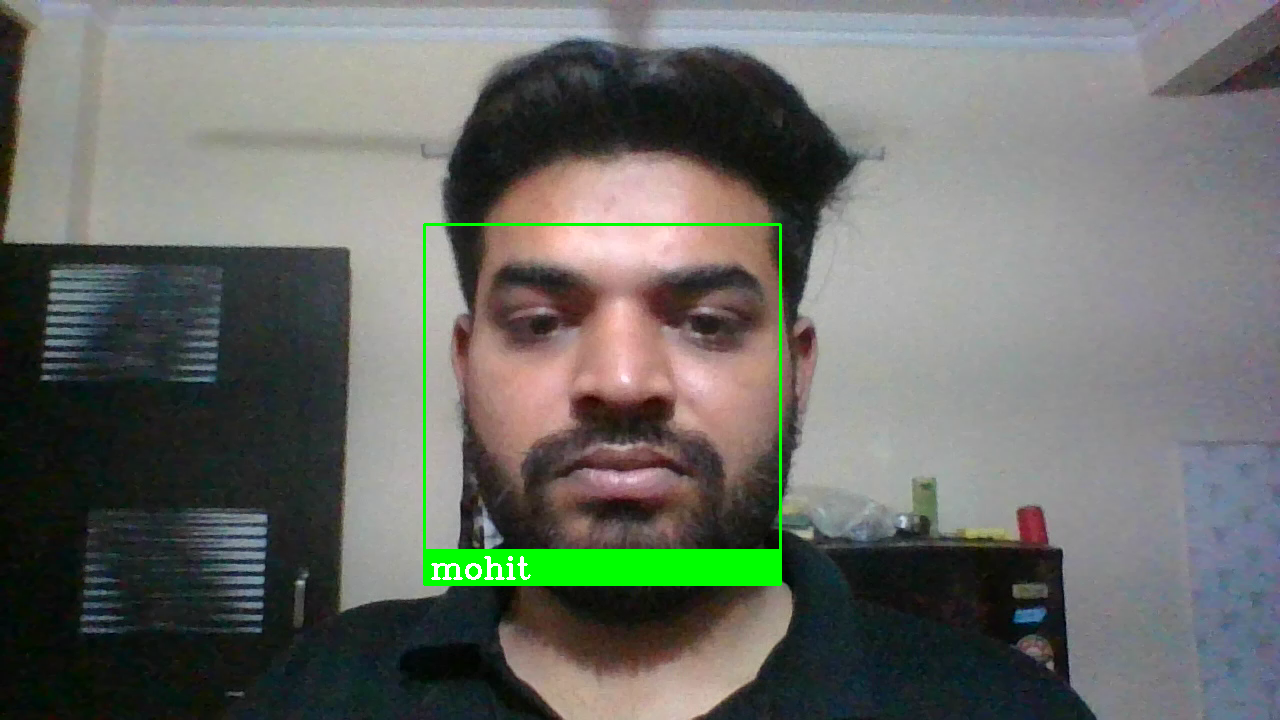

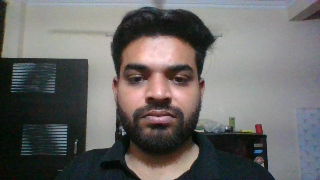

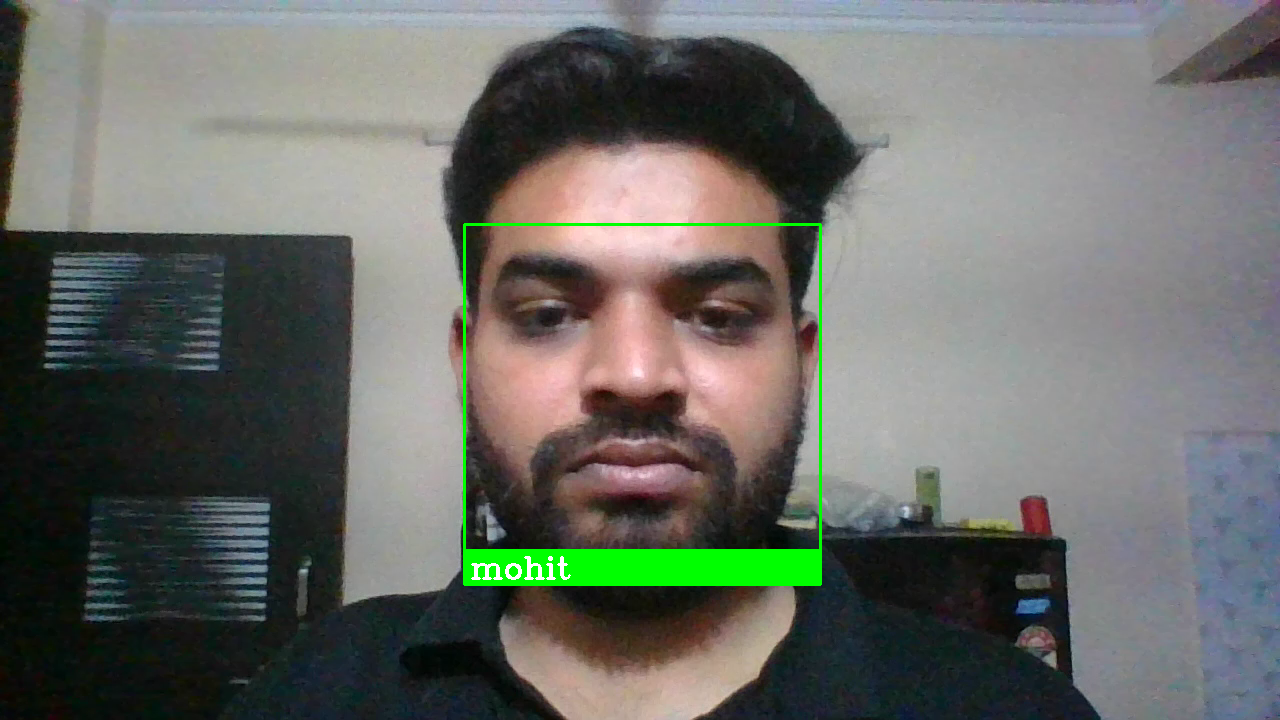

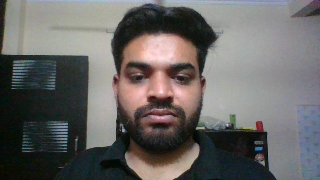

In [ ]:
# cap = cv2.VideoCapture(0)  #live webcm is not accessible passing

cap = cv2.VideoCapture('/content/drive/MyDrive/Attendance system/mohit_webcam.mp4')  #live webcm is not accessible passing video feed for testing

# print(cap)
while True:
    success, img = cap.read()
# img = captureScreen()
    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    # cv2.imshow(imgS) #test2
    cv2_imshow(imgS) #for google colab

    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
# print(faceDis)
        matchIndex = np.argmin(faceDis)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper().lower()
# print(name)
            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            markAttendance(name)

    # cv2.imshow('Webcam', img)
    cv2_imshow(img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break